In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sqlalchemy import create_engine

username = 'postgres'
password = os.environ['Password']
database = 'SQL_HW_1'
postgress_machine = 'localhost:5432'

engine = create_engine(f'postgresql://{username}:{password}@{postgress_machine}/{database}')
connection = engine.connect()

In [2]:
employees = pd.read_sql('Select distinct t.title From public."Titles" t', connection)

In [3]:
mylist = employees['title'].tolist()

In [25]:
Salaries = []

for i in mylist:
    frame = pd.read_sql(f'''
    Select round(AVG(s.salary),2) as Average_Salary
    from public."Salaries" s
    join "Titles" t ON t.emp_no = s.emp_no
    where t.title = '{i}' ''', connection)
    Salaries.append(frame['average_salary'].to_list())

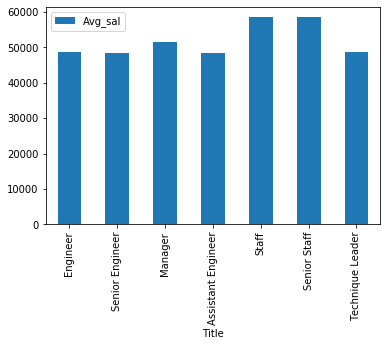

In [36]:
thing = pd.DataFrame(Salaries).rename(columns = {0 :'Avg_sal'})
thing['Title'] = mylist
thing.plot(kind = 'bar', x = 'Title')